# Machine Learning Project Template

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

### 1.1) Load Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [95]:
df = pd.read_csv('SoftwareDefect.csv')
print(df.shape)
df.head()


(10885, 22)


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [96]:
print(df.info())
print()
print(df.describe())
print()
print(df.isnull().sum())
print()
print(df.columns)
print()
print(df['defects'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

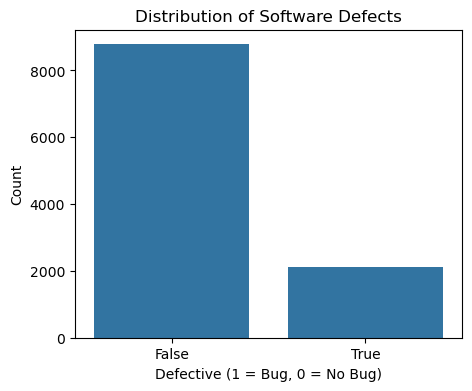

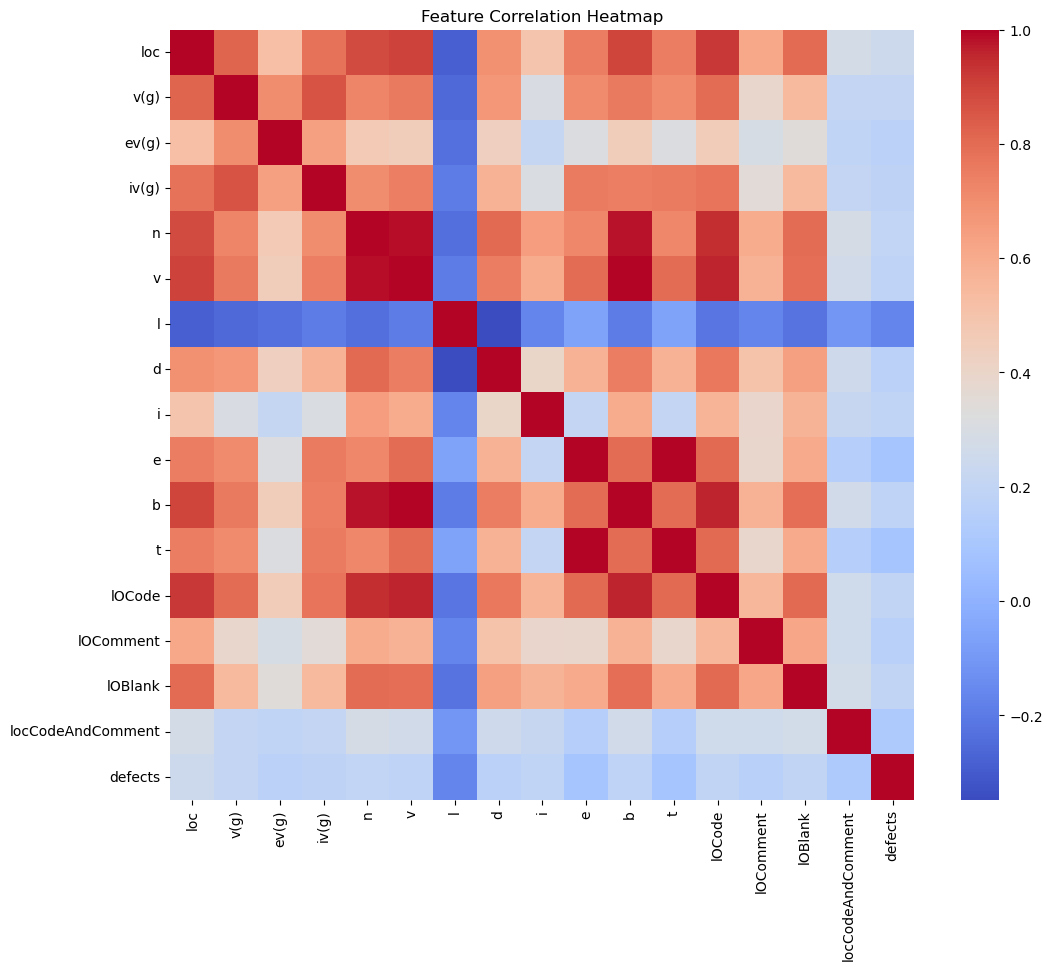

In [97]:

plt.figure(figsize=(5, 4))
sns.countplot(x='defects', data=df)
plt.title("Distribution of Software Defects")
plt.xlabel("Defective (1 = Bug, 0 = No Bug)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [98]:

print(df.isnull().sum())

print(df['defects'].unique())



loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
[False  True]


### 3.1) Feature Selection
Select the most relevant features for the model.

In [99]:

df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')



df.dropna(inplace=True)


print(f"Number of features: {X.shape[1]}")

Number of features: 21


### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

In [100]:
X = df.drop('defects', axis=1)
y = df['defects']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

In [101]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training:", X_train.shape)
print("Testing:", X_test.shape)

Training: (8704, 21)
Testing: (2176, 21)


### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

In [102]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))



 Logistic Regression
[[1288  467]
 [ 166  255]]
              precision    recall  f1-score   support

       False       0.89      0.73      0.80      1755
        True       0.35      0.61      0.45       421

    accuracy                           0.71      2176
   macro avg       0.62      0.67      0.62      2176
weighted avg       0.78      0.71      0.73      2176

ROC AUC: 0.6698019232461038

 Random Forest
[[1663   92]
 [ 337   84]]
              precision    recall  f1-score   support

       False       0.83      0.95      0.89      1755
        True       0.48      0.20      0.28       421

    accuracy                           0.80      2176
   macro avg       0.65      0.57      0.58      2176
weighted avg       0.76      0.80      0.77      2176

ROC AUC: 0.5735516440979624

 Gradient Boosting
[[1699   56]
 [ 374   47]]
              precision    recall  f1-score   support

       False       0.82      0.97      0.89      1755
        True       0.46      0.11      0.1

### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

In [103]:
#output of classification_report

## <b> <font color=green> STEP (5)  Performance Tuning & Optimization </font> </b>

### 5.1) Algorithm Tuning
Optimize hyperparameters for better performance.

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


print("the best :", grid_search.best_params_)
best_model = grid_search.best_estimator_


### 5.2) Ensembles
Combine multiple models to improve accuracy.

In [ ]:

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
gbc = GradientBoostingClassifier(random_state=42)

voting = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', best_rf),
        ('gb', gbc)
    ],
    voting='hard'
)


voting.fit(X_train, y_train)


y_pred = voting.predict(X_test)
print(" Confusion Matrix (Voting):\n", confusion_matrix(y_test, y_pred))
print(" Classification Report (Voting):\n", classification_report(y_test, y_pred))
print(" ROC AUC Score (Voting):", roc_auc_score(y_test, y_pred))


## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

In [ ]:

y_pred = best_rf.predict(X_test)

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred))


### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

In [ ]:

final_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split']
)

final_model.fit(X_scaled, y) 


### 6.3) Save Model for Later Use
Save the trained model to a file.

In [ ]:

joblib.dump(final_model, 'software_bug_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [93]:
# load
model = joblib.load('software_bug_classifier.pkl')
scaler = joblib.load('scaler.pkl')

#new data
# new_data = pd.DataFrame(...)

# new_scaled = scaler.transform(new_data)
# prediction = model.predict(new_scaled)
